In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
%matplotlib inline

In [404]:
df = pd.read_csv('./data/2019-06-04/eth_mxn.csv')
df2 = (df.loc[(df.Porcentage > 0) | (df.Porcentage < 0)])

In [405]:
df2['Time'] = df.Time.str.replace(':', '')
df2.head()

/Users/imac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,eth_mxn,Porcentage,Time
22,4949.00,-0.020202,003133
23,4929.00,-0.404122,003206
26,4950.00,0.426050,003345
31,4989.32,0.794343,003629
46,4989.33,0.000200,004441


In [406]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 22 to 1526
Data columns (total 3 columns):
eth_mxn       274 non-null float64
Porcentage    274 non-null float64
Time          274 non-null object
dtypes: float64(2), object(1)
memory usage: 8.6+ KB


In [407]:
df2.describe()

,eth_mxn,Porcentage
count,274.000000,274.000000
mean,4876.056825,-0.014684
std,87.327227,0.921594
min,4700.000000,-2.942847
25%,4799.977500,-0.538488
50%,4900.000000,-0.000609
75%,4945.430000,0.502839
max,4989.330000,3.033611


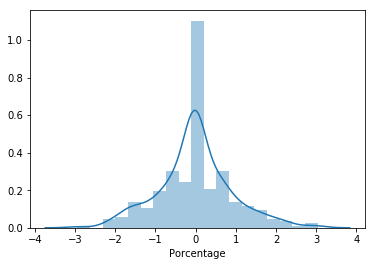

In [427]:
sns.distplot(df2['Porcentage'])

In [409]:
df2.columns

Index(['eth_mxn', 'Porcentage', 'Time'], dtype='object')

In [410]:
X = df2[['Time']]

In [411]:
y = df2["Porcentage"]

In [412]:
from sklearn.model_selection import train_test_split

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [414]:
from sklearn.linear_model import LinearRegression

In [415]:
lm = LinearRegression()

In [416]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [417]:
print(lm.intercept_)

0.12199135593738962


In [418]:
lm.coef_

array([-1.74663802e-06])

In [419]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])

In [420]:
cdf

,Coef
Time,-0.000002


# Predictions

In [421]:
predictions = lm.predict(X_test)

In [422]:
predictions

array([-0.1110119 ,  0.0491321 ,  0.01612239, -0.08848726, -0.09199451,
       -0.00517612, -0.09538124, -0.11264326, -0.08804187,  0.0665618 ,
       -0.07836549,  0.00809658, -0.0217587 , -0.12351434, -0.12395973,
       -0.1117682 , -0.09550874, -0.09375163, -0.04208607, -0.00747644,
       -0.11452614, -0.00797598,  0.06935817, -0.05426189, -0.05532384,
        0.09938986, -0.09155086, -0.1248348 , -0.00909208, -0.04446325,
       -0.07510277, -0.00156756, -0.07070998, -0.05864944, -0.09098844,
       -0.00175445, -0.12709145, -0.11346069, -0.12420601, -0.05288554,
       -0.10656147, -0.03941197,  0.06749101, -0.07334216, -0.02231937,
       -0.07459974, -0.0897396 , -0.11283015, -0.09588427, -0.0792423 ,
       -0.0571386 , -0.07127065, -0.10831335, -0.05657793, -0.05896558,
        0.06854423,  0.00997073,  0.04608945, -0.11037962, -0.00647736,
       -0.10825396, -0.07454035, -0.09343723, -0.09287481, -0.06059345,
       -0.12664781, -0.08979724, -0.03984164,  0.11651914, -0.02

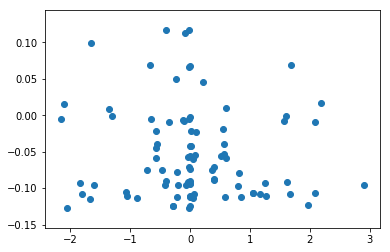

In [423]:
plt.scatter(y_test,predictions)

/Users/imac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


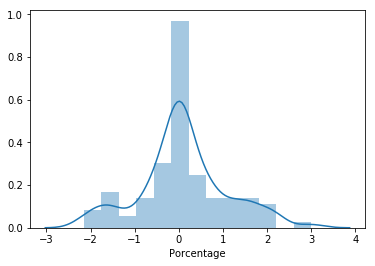

In [424]:
sns.distplot((y_test-predictions))